# Introduction
We ...

# Preparing the dataset
We merge two different datasets...

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import csv
import numpy as np
import urllib
from math import log

### The Education Index

The UN maintains and publishes an education index which is used by them to compute the Human Development Index. Their dataset, though not perfect, seems much better than the one we got from the worldbank website; especially if we consider it from 1999 onwards. Given that the purpose of the HDI is humanitarian, it suggests to me that this is probably as good a dataset as we’ll find for African countries. It can be downloaded here http://hdr.undp.org/en/indicators/103706. It is defined by the following formula:

$$ EI = \frac{ \frac{EYS}{18} + \frac{MYS}{15} }{2} $$

where $EYS$ is expected years of schooling and $MYS$ is average number of education years students over the age of 25 have actually received.

In [3]:
# ei = pd.read_csv("data/Education_index.csv") 

# data is hosted on GitHub
ei_url = 'https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/Education_index.csv'

# the commented line above was throwing parsing errors, I think it's because the csv for the EI
# is weirdly formatted.
# We parse it manually below, using python's csv module.
with urllib.request.urlopen(ei_url) as rsp:
    csvfile = [l.decode('latin1') for l in rsp.readlines()]
    ei = csv.reader(csvfile)
    raw = [row[1:] for row in list(ei)[6:-1]]
    # all the even (excluding 0th column) columns are empty, i'll remove them below
    formatted_rows = []
    for row in raw:
        formatted_rows.append([row[0]] + row[1::2])
    
# Maybe there is a simpler way to do this, but this also works.

In [4]:
# Adds column names and converts the list of data to a pandas DataFrame object
cols = ['country'] + list(range(1990, 2020))
education = pd.DataFrame(formatted_rows, columns=cols)

In [5]:
# This is what the Education Index table looks like from 1999 to 2019
education

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.122,0.133,0.145,0.156,0.168,0.179,0.190,0.202,0.213,...,0.372,0.374,0.390,0.398,0.403,0.405,0.406,0.408,0.413,0.414
1,Albania,0.583,0.588,0.557,0.542,0.541,0.550,0.557,0.569,0.579,...,0.671,0.714,0.739,0.749,0.758,0.753,0.745,0.747,0.743,0.746
2,Algeria,0.385,0.395,0.405,0.414,0.424,0.431,0.443,0.458,0.473,...,0.626,0.644,0.639,0.639,0.652,0.659,0.660,0.665,0.668,0.672
3,Andorra,..,..,..,..,..,..,..,..,..,...,0.670,0.671,0.724,0.714,0.725,0.718,0.722,0.713,0.720,0.720
4,Angola,..,..,..,..,..,..,..,..,..,...,0.398,0.423,0.435,0.447,0.460,0.472,0.487,0.498,0.500,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Sub-Saharan Africa,0.285,0.290,0.297,0.304,0.310,0.319,0.326,0.332,0.340,...,0.422,0.429,0.437,0.449,0.452,0.457,0.460,0.465,0.466,0.471
202,Least Developed Countries,0.223,0.228,0.233,0.239,0.244,0.251,0.259,0.268,0.277,...,0.388,0.396,0.403,0.408,0.411,0.419,0.424,0.430,0.431,0.437
203,Small Island Developing States,0.466,0.471,0.477,0.483,0.485,0.492,0.500,0.506,0.512,...,0.607,0.613,0.604,0.609,0.615,0.621,0.624,0.628,0.627,0.633
204,Organization for Economic Co-operation and Dev...,0.679,0.688,0.681,0.709,0.720,0.729,0.735,0.728,0.747,...,0.818,0.824,0.828,0.835,0.841,0.846,0.850,0.851,0.852,0.852


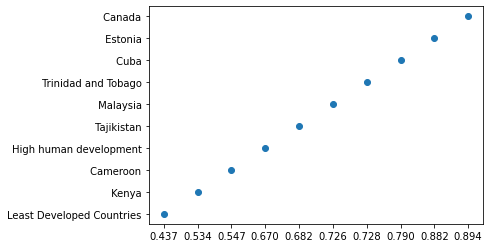

In [6]:
sample = education.sample(10).sort_values(by = 2019, ascending = True)
plt.scatter(sample[2019], sample.country)

## Worldbank data

The rest of our data comes from Worldbank's database.

In [7]:
#cpi = pd.read_csv("https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/time_on_vertical_1996-2020/cpi_base2010.csv")
#cpi = pd.DataFrame(cpi)

work_pop = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/521aa38d-fdf9-4b04-a31e-e8a12c6753dd_Data.csv')
work_pop = pd.DataFrame(work_pop)

pop_growth = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/e65a7cf4-b4af-4fca-a1ef-7cd396465237_Data.csv')
pop_growth = pd.DataFrame(pop_growth)

gdp_growth = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/9dafeb4d-c5ca-4008-9497-8f9612ce8967_Data.csv')
gdp_growth = pd.DataFrame(gdp_growth)

kgdp = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/11ce0515-b87a-4bff-8ded-98e24d00470f_Data.csv')
kgdp = pd.DataFrame(kgdp)

# import Penn World Table dataset

pwt = pd.read_excel('https://github.com/iatrogenic/Solow-TPROG/blob/main/data/data_PWT/pwt100.xlsx?raw=true', sheet_name = 'Data')
pwt = pd.DataFrame(pwt)

# education data is already imported on the previous section but perhaps should be reshaped so as to match
# the data imported above

In [8]:
# create a dataframe with World Bank data

df1 = pd.concat([gdp_growth, work_pop, pop_growth, kgdp], axis = 1) # merge dataframes
df1 = df1.loc[:,~df1.columns.duplicated()] # remove duplicate columns
df1 = df1.dropna()
df1.reset_index(drop = True)
df1
# delete two unecessary columns
del df1['Country Name']
del df1['Time Code']

# rename columns
df1.rename(columns = {'Country Code': 'country_code'}, inplace = True)
df1.rename(columns = {'Time': 'year'}, inplace = True)
df1.rename(columns = {'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]': 'gdp_growth'}, inplace = True)
df1.rename(columns = {'Population ages 15-64, total [SP.POP.1564.TO]': 'work_pop'}, inplace = True)
df1.rename(columns = {'Population growth (annual %) [SP.POP.GROW]': 'pop_growth'}, inplace = True)
df1.rename(columns = {'Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS]': 'kgdp'}, inplace = True)

# remove rows for years before 2000 and after 2018
df1 = df1[df1['year'] > 1999]
df1 = df1[df1['year'] < 2019]


# convert to numeric
#print(df1.dtypes)
df1['gdp_growth'] = pd.to_numeric(df1['gdp_growth'], errors='coerce')
df1['work_pop'] = pd.to_numeric(df1['work_pop'], errors='coerce')
df1['pop_growth'] = pd.to_numeric(df1['pop_growth'], errors='coerce')
df1['kgdp'] = pd.to_numeric(df1['kgdp'], errors='coerce')
#print(df1.dtypes)

#print(df1)

In [9]:
# create a dataframe with Penn World dataset

df2 = pwt[['countrycode', 'year', 'cn', 'labsh', 'delta', 'rgdpna', 'rnna', 'pop']] # keep columns we need

# rename columns
df2.rename(columns = {'countrycode': 'country_code'}, inplace = True)
df2.rename(columns = {'cn': 'nom_capital_stock'}, inplace = True)
df2.rename(columns = {'labsh': 'labour_share_income'}, inplace = True)
df2.rename(columns = {'rgdpna': 'real_y'}, inplace = True)
df2.rename(columns = {'rnna': 'real_k'}, inplace = True)

# remove rows for years before 2000 and after 2018
df2 = df2[df2['year'] > 1999]
df2 = df2[df2['year'] < 2019]

#print(df1.dtypes) # already all numeric

#print(df2)

/Users/lack/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
# merge dataframes containing data from World Bank (df1) and Penn World Table (df2)

df = df1.merge(df2)
df = df.dropna()
df

# still necessary to merge with education

,country_code,year,gdp_growth,work_pop,pop_growth,kgdp,nom_capital_stock,labour_share_income,delta,real_y,real_k,pop
38,AGO,2000.0,3.054624,8235987.0,3.277215,30.493219,343557.875000,0.284385,0.040218,81636.476562,862813.937500,16.395473
39,AGO,2001.0,4.205999,8513768.0,3.301174,30.493219,345280.343750,0.284385,0.039816,84199.867188,863955.250000,16.945753
40,AGO,2002.0,13.665687,8811564.0,3.329262,30.493173,348801.593750,0.284385,0.039587,96434.101562,867976.312500,17.519417
41,AGO,2003.0,2.989850,9130222.0,3.378794,30.451111,356889.250000,0.291653,0.039633,99317.335938,876801.500000,18.121479
42,AGO,2004.0,10.952862,9470294.0,3.452988,30.893669,368675.781250,0.275553,0.040158,110195.656250,892691.187500,18.758145
...,...,...,...,...,...,...,...,...,...,...,...,...
3415,ZWE,2014.0,2.376929,7430927.0,1.754741,9.639224,57715.582031,0.533381,0.050507,41273.582031,63399.503906,13.586707
3416,ZWE,2015.0,1.779873,7543272.0,1.663694,10.035640,61790.628906,0.533381,0.052084,42008.199219,64916.476562,13.814629
3417,ZWE,2016.0,0.755869,7642765.0,1.549294,9.861371,64844.191406,0.533381,0.053471,42325.726562,66257.859375,14.030331
3418,ZWE,2017.0,4.699400,7759792.0,1.459406,8.972336,67627.562500,0.533381,0.054693,44316.742188,67627.562500,14.236595


In [11]:
# data transformation & creation


# create: capital share of income
df['capital_share_income'] = 1 - df['labour_share_income']

# adjust units of gdp growth
df['gdp_growth'] = df['gdp_growth']
df['delta'] = df['delta'] * 100

# adjust units of population growth
df['pop_growth'] = df['pop_growth']

# adjust units
#df['work_pop'] = df['work_pop'] / 1000000

# adjust units
df['real_y'] = df['real_y'] / 10
10
# adjust units
df['real_k'] = df['real_k']

# create: real gdp per working-age population (in millions of US dollars)
df['real_gdp_per_work_pop'] = (df['real_y'] / df['pop'])

# create: real capital stock's share of real gdp (savings)
df['savings'] = round(df['kgdp'], 2)
#df['savings'] = df['real_k'] / df['real_y']

#df['real_y'] = (df['real_y']/df['real_y'].max())*100
df = df.dropna()
df


,country_code,year,gdp_growth,work_pop,pop_growth,kgdp,nom_capital_stock,labour_share_income,delta,real_y,real_k,pop,capital_share_income,real_gdp_per_work_pop,savings
38,AGO,2000.0,3.054624,8235987.0,3.277215,30.493219,343557.875000,0.284385,4.021794,8163.647656,862813.937500,16.395473,0.715615,497.920838,30.49
39,AGO,2001.0,4.205999,8513768.0,3.301174,30.493219,345280.343750,0.284385,3.981582,8419.986719,863955.250000,16.945753,0.715615,496.878877,30.49
40,AGO,2002.0,13.665687,8811564.0,3.329262,30.493173,348801.593750,0.284385,3.958665,9643.410156,867976.312500,17.519417,0.715615,550.441271,30.49
41,AGO,2003.0,2.989850,9130222.0,3.378794,30.451111,356889.250000,0.291653,3.963318,9931.733594,876801.500000,18.121479,0.708347,548.064184,30.45
42,AGO,2004.0,10.952862,9470294.0,3.452988,30.893669,368675.781250,0.275553,4.015832,11019.565625,892691.187500,18.758145,0.724447,587.454976,30.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,ZWE,2014.0,2.376929,7430927.0,1.754741,9.639224,57715.582031,0.533381,5.050694,4127.358203,63399.503906,13.586707,0.466619,303.779143,9.64
3416,ZWE,2015.0,1.779873,7543272.0,1.663694,10.035640,61790.628906,0.533381,5.208429,4200.819922,64916.476562,13.814629,0.466619,304.084889,10.04
3417,ZWE,2016.0,0.755869,7642765.0,1.549294,9.861371,64844.191406,0.533381,5.347063,4232.572656,66257.859375,14.030331,0.466619,301.673044,9.86
3418,ZWE,2017.0,4.699400,7759792.0,1.459406,8.972336,67627.562500,0.533381,5.469295,4431.674219,67627.562500,14.236595,0.466619,311.287511,8.97


In [12]:
# compute (g + delta) & create new variable (n + g + delta)

# compute g & delta
g_delta = df.groupby(['country_code'])['gdp_growth', 'delta'].agg('mean')
g = g_delta['gdp_growth'].mean()
delta = g_delta['delta'].mean()
print(g)
print(delta)

# create: (n + g + delta)
df['(n+g+delta)'] = round(df['pop_growth'],2) + (round(g,2)) + (round(delta,2))
#df

3.8757534419100614
4.337222706274229


<ipython-input-12-dbfb8b220180>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g_delta = df.groupby(['country_code'])['gdp_growth', 'delta'].agg('mean')


In [13]:
# collapse regressor values in df to their arithmetic means

df_regression = df.groupby(['country_code'])['savings', '(n+g+delta)', 'pop'].agg('mean')
df_regression = df_regression[df_regression['pop'] > 1]

df_regression = df_regression.drop('AGO')# zero savings

df_regression

<ipython-input-13-91101f5e5846>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_regression = df.groupby(['country_code'])['savings', '(n+g+delta)', 'pop'].agg('mean')


,savings,(n+g+delta),pop
country_code,,,
ARG,17.114211,9.267895,40.553960
ARM,29.345263,7.981053,2.949849
AUS,26.433684,9.681053,21.785345
AUT,24.152632,8.750000,8.417650
AZE,27.872105,9.374211,8.975521
...,...,...,...
UZB,26.592105,9.820000,28.282845
VEN,24.432000,9.790000,27.213153
ZAF,19.210000,9.613158,50.901472


In [14]:
# compute real gdp per working age population in last year of sample (2018)
# and attach to df_regression

df_2018 = df[df.year == 2018]
df_2018 = df_2018.set_index('country_code', drop = True)
df_2018['real_gdp_per_work_pop_2018'] = df_2018['real_gdp_per_work_pop']
#df_2018['country_code'].astype(str)
#df_regression['country_code'].astype(str)

df_regression = df_regression.merge(df_2018['real_gdp_per_work_pop_2018'], on = 'country_code')
pd.set_option('display.max_rows', None)
df_regression

,savings,(n+g+delta),pop,real_gdp_per_work_pop_2018
country_code,,,,
ARG,17.114211,9.267895,40.553960,2247.770008
ARM,29.345263,7.981053,2.949849,1362.251662
AUS,26.433684,9.681053,21.785345,5299.561490
AUT,24.152632,8.750000,8.417650,5286.626790
AZE,27.872105,9.374211,8.975521,1415.297327
BDI,12.296316,11.265263,8.522267,81.336090
BEL,23.466842,8.803684,10.859221,4571.851481
BEN,17.144211,11.083684,9.031222,318.830951
BFA,19.049474,11.167895,15.341245,199.087576


In [15]:
# set up regressors and regressand, then estimate model

# large (n+g+delta) outlier, and large oil producers
#df_regression = df_regression.drop('SAU')
#df_regression = df_regression.drop('OMN')

# OPEC
#df_regression = df_regression.drop('GNQ')
#df_regression = df_regression.drop('COG')
#df_regression = df_regression.drop('QWT')
#df_regression = df_regression.drop('VEN')
#df_regression = df_regression.drop('#')

#df_regression = df_regression.drop('QAT')
#df_regression = df_regression.drop('IDN')
#df_regression = df_regression.drop('SAU')
#df_regression = df_regression.drop('IRN')
#df_regression = df_regression.drop('IRQ')
#df_regression = df_regression.drop('NGA')
#df_regression = df_regression.drop('ECU')
#df_regression = df_regression.drop('GAB')


X = df_regression[['savings', '(n+g+delta)']] # regressors
X = np.log(X) # natural log of regressors
X = sm.add_constant(X) # add a constant to ensure mean of residuals = 0
Y = df_regression['real_gdp_per_work_pop_2018'] # regressand
Y = np.log(Y) # natural log of regressand

X = X.dropna()
Y = Y.dropna()

# estimate OLS
# compute heteroskedasticity-robust standard errors ('HC3')
model = sm.OLS(Y,X).fit(cov_type = 'HC3')
#model = sm.OLS(Y,X).fit()

model.summary()
# result.bse
# result.t_test(...)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     real_gdp_per_work_pop_2018   R-squared:                       0.167
Model:                                    OLS   Adj. R-squared:                  0.153
Method:                         Least Squares   F-statistic:                     6.859
Date:                        Mon, 29 Nov 2021   Prob (F-statistic):            0.00154
Time:                                12:09:35   Log-Likelihood:                -164.99
No. Observations:                         116   AIC:                             336.0
Df Residuals:                             113   BIC:                             344.2
Df Model:                                   2                                         
Covariance Type:                          HC3                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.9074      3.779      2.887      0.004       3.501      18.313
savings         0.9068      0.526      1.723      0.085      -0.125       1.938
(n+g+delta)    -2.8869      1.260     -2.291      0.022      -5.357      -0.417
==============================================================================
Omnibus:                        1.148   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                0.763
Skew:                           0.179   Prob(JB):                        0.683
Kurtosis:                       3.174   Cond. No.                         88.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

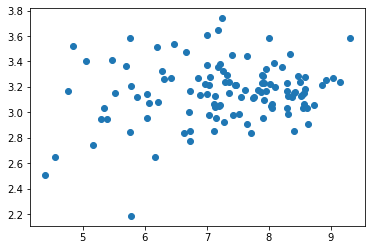

In [16]:
dx = pd.DataFrame(X)
dy = pd.DataFrame(Y)

fig, ax = plt.subplots()
ax.scatter(dy['real_gdp_per_work_pop_2018'], dx['savings'])
#ax.scatter(dy['real_gdp_per_work_pop_2018'], dx['(n+g+delta)'])